Mainstream Bias in Dynamic Recommendation

In [1]:
# Import dependencies
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs
import warnings; warnings.simplefilter('ignore')  # Ignore warnings for cleaner output
# import time
import numpy as np
import argparse
# import utility
from Simulation_basic import Simulation
import pickle
import pandas as pd
# from tqdm import tqdm
from math import log
from scipy.sparse import coo_matrix
# import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import skew
# from scipy.stats import mode
# from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Parse command-line arguments
# args = parser.parse_args()

# Define the default values for arguments
default_args = {
    'run': 1,
    'iteration': 1000,
    'exp': 1,
    'cycle_itr': 50,
    'epoch': 20,
    'K': 20,
    'lr': 0.001,
    'reg': 1e-5,
    'hidden': 100,
    'neg': 5,
    'data': 'ml1m'
}

# Create the args object with default values
args = argparse.Namespace(**default_args)

In [3]:
# Load truth data and set experiment parameters
truth = np.load('./Data/' + args.data + '/truth.npy')
args.num_user = truth.shape[0]
args.num_item = truth.shape[1]
audience_size = np.sum(truth, axis=0)
item_sorted = np.argsort(audience_size)
truth_like = np.load('./Data/' + args.data + '/user_truth_like.npy', allow_pickle=True)

print("Number of Items: " + str(len(truth_like)) + "\n")

Number of Items: 223869



In [4]:
# # Calculate mainstream scores (MS_similarity) using your code
user_item_matrix = truth.copy()  # Assuming truth already represents user-item interactions

# Calculate user popularity based on the user-item matrix
user_pop = np.sum(user_item_matrix, axis=1)

# Calculate Jaccard similarity matrix based on the user-item matrix
Jaccard_mat = np.matmul(user_item_matrix, user_item_matrix.T)
deno = user_pop.reshape((-1, 1)) + user_pop.reshape((1, -1)) - Jaccard_mat + 1e-7
Jaccard_mat /= deno
np.fill_diagonal(Jaccard_mat, 0)  # Set diagonal to zero to exclude self-similarity

# Calculate Mainstream Similarity (MS_similarity) by taking the mean along axis 1
MS_similarity = np.mean(Jaccard_mat, axis=1)

# Save the MS similarity to a file (adjust the path accordingly)
with open(f'./Data/{args.data}/MS_similarity.npy', "wb") as f:
    np.save(f, MS_similarity)

print("Mainstream scores: " + str(len(MS_similarity)) + "\n")
print("Args Number of Users: " + str(args.num_user) + "\n")

Mainstream scores: 1000

Args Number of Users: 1000



In [5]:
# Initialize a list to store Gini coefficients after each epoch
gini_coefficients = []

# Run the experiment for a specified number of runs
for r in range(args.run):
    print('')
    print('#' * 100)
    print('#' * 100)
    print(' ' * 50 + ' Experiment run ' + str(r + 1) + ' ' * 50)
    print('#' * 100)
    print('#' * 100)

    # Initialize the simulation with provided arguments and data
    simulation = Simulation(args, truth, truth_like)
    init_popularity = simulation.initial_iterations()  # Perform initial iterations to gather feedback
    gini_coefficients.append(simulation.run_simulation())  # Run the main simulation


####################################################################################################
####################################################################################################
                                                   Experiment run 1                                                  
####################################################################################################
####################################################################################################
Namespace(K=20, cycle_itr=50, data='ml1m', epoch=20, exp=1, hidden=100, iteration=1000, lr=0.001, neg=5, num_item=3406, num_user=1000, reg=1e-05, run=1)
****************************** Start initial random iterations ******************************
---------- Iteration 1 ----------


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 3577.39it/s]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Generate 471 records.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
****************************** Train MF until converge ******************************
Update bs to 56








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
******************************MF initialization done ******************************


100%|██████████| 50/50 [00:00<00:00, 116.01it/s]


Training // Epoch 0 //  Total cost = 34.6871  Total cost1 = 34.6468  Total cost2 = 0.0403


100%|██████████| 50/50 [00:00<00:00, 144.51it/s]


Training // Epoch 1 //  Total cost = 34.3299  Total cost1 = 34.3026  Total cost2 = 0.0273


100%|██████████| 50/50 [00:00<00:00, 163.13it/s]


Training // Epoch 2 //  Total cost = 33.8415  Total cost1 = 33.8068  Total cost2 = 0.0347


100%|██████████| 50/50 [00:00<00:00, 145.99it/s]


Training // Epoch 3 //  Total cost = 33.0400  Total cost1 = 32.9922  Total cost2 = 0.0478


100%|██████████| 50/50 [00:00<00:00, 162.08it/s]


Training // Epoch 4 //  Total cost = 31.8408  Total cost1 = 31.7733  Total cost2 = 0.0675


100%|██████████| 50/50 [00:00<00:00, 149.92it/s]


Training // Epoch 5 //  Total cost = 30.1209  Total cost1 = 30.0268  Total cost2 = 0.0941


100%|██████████| 50/50 [00:00<00:00, 142.65it/s]


Training // Epoch 6 //  Total cost = 27.8490  Total cost1 = 27.7203  Total cost2 = 0.1287


100%|██████████| 50/50 [00:00<00:00, 134.41it/s]


Training // Epoch 7 //  Total cost = 24.9669  Total cost1 = 24.7963  Total cost2 = 0.1706


100%|██████████| 50/50 [00:00<00:00, 163.67it/s]


Training // Epoch 8 //  Total cost = 21.5728  Total cost1 = 21.3519  Total cost2 = 0.2209


100%|██████████| 50/50 [00:00<00:00, 150.38it/s]


Training // Epoch 9 //  Total cost = 17.5041  Total cost1 = 17.2240  Total cost2 = 0.2801


100%|██████████| 50/50 [00:00<00:00, 125.16it/s]


Training // Epoch 10 //  Total cost = 13.1237  Total cost1 = 12.7789  Total cost2 = 0.3448


100%|██████████| 50/50 [00:00<00:00, 138.31it/s]


Training // Epoch 11 //  Total cost = 8.3014  Total cost1 = 7.8841  Total cost2 = 0.4173


100%|██████████| 50/50 [00:00<00:00, 91.57it/s]


Training // Epoch 12 //  Total cost = 3.0644  Total cost1 = 2.5668  Total cost2 = 0.4975


100%|██████████| 50/50 [00:00<00:00, 106.27it/s]


Training // Epoch 13 //  Total cost = -2.8700  Total cost1 = -3.4546  Total cost2 = 0.5846


100%|██████████| 50/50 [00:00<00:00, 117.51it/s]


Training // Epoch 14 //  Total cost = -8.9634  Total cost1 = -9.6417  Total cost2 = 0.6784


100%|██████████| 50/50 [00:00<00:00, 148.37it/s]


Training // Epoch 15 //  Total cost = -15.2575  Total cost1 = -16.0375  Total cost2 = 0.7801


100%|██████████| 50/50 [00:00<00:00, 133.16it/s]


Training // Epoch 16 //  Total cost = -22.1916  Total cost1 = -23.0789  Total cost2 = 0.8873


100%|██████████| 50/50 [00:00<00:00, 130.55it/s]


Training // Epoch 17 //  Total cost = -29.3584  Total cost1 = -30.3573  Total cost2 = 0.9989


100%|██████████| 50/50 [00:00<00:00, 138.31it/s]


Training // Epoch 18 //  Total cost = -36.8070  Total cost1 = -37.9258  Total cost2 = 1.1189


100%|██████████| 50/50 [00:00<00:00, 153.85it/s]


Training // Epoch 19 //  Total cost = -44.4864  Total cost1 = -45.7317  Total cost2 = 1.2454
****************************** Start simulation ******************************
****************************** Epoch 0 ******************************


100%|██████████| 50/50 [00:00<00:00, 3571.87it/s]


0.03250587382469175
########## The iteration 1000, up to now total 1893 clicks, GC=0.0325, this cycle used 0.73 s) ##########
Update bs to 227


100%|██████████| 20/20 [00:06<00:00,  3.24it/s]



****************************** Epoch 1 ******************************


100%|██████████| 50/50 [00:00<00:00, 2702.69it/s]


0.03131634765215032
########## The iteration 1000, up to now total 4370 clicks, GC=0.0313, this cycle used 0.67 s) ##########
Update bs to 524


100%|██████████| 20/20 [00:06<00:00,  3.19it/s]



****************************** Epoch 2 ******************************


100%|██████████| 50/50 [00:00<00:00, 3999.68it/s]


0.029600969373117635
########## The iteration 1000, up to now total 7254 clicks, GC=0.0296, this cycle used 0.63 s) ##########
Update bs to 870


100%|██████████| 20/20 [00:06<00:00,  3.19it/s]



****************************** Epoch 3 ******************************


100%|██████████| 50/50 [00:00<00:00, 4166.55it/s]


0.028510239014192914
########## The iteration 1000, up to now total 9937 clicks, GC=0.0285, this cycle used 0.63 s) ##########
Update bs to 1192


100%|██████████| 20/20 [00:07<00:00,  2.73it/s]



****************************** Epoch 4 ******************************


100%|██████████| 50/50 [00:00<00:00, 3333.42it/s]


0.027061038058547884
########## The iteration 1000, up to now total 12554 clicks, GC=0.0271, this cycle used 0.68 s) ##########
Update bs to 1506


100%|██████████| 20/20 [00:07<00:00,  2.70it/s]



****************************** Epoch 5 ******************************


100%|██████████| 50/50 [00:00<00:00, 3334.00it/s]


0.025598543373902074
########## The iteration 1000, up to now total 15000 clicks, GC=0.0256, this cycle used 0.70 s) ##########
Update bs to 1800


100%|██████████| 20/20 [00:07<00:00,  2.66it/s]



****************************** Epoch 6 ******************************


100%|██████████| 50/50 [00:00<00:00, 3448.64it/s]


0.0245369540946848
########## The iteration 1000, up to now total 17319 clicks, GC=0.0245, this cycle used 0.78 s) ##########
Update bs to 2078


100%|██████████| 20/20 [00:07<00:00,  2.58it/s]



****************************** Epoch 7 ******************************


100%|██████████| 50/50 [00:00<00:00, 3333.26it/s]


0.023379448286944077
########## The iteration 1000, up to now total 19501 clicks, GC=0.0234, this cycle used 0.68 s) ##########
Update bs to 2340


100%|██████████| 20/20 [00:08<00:00,  2.47it/s]



****************************** Epoch 8 ******************************


100%|██████████| 50/50 [00:00<00:00, 4000.21it/s]


0.022013207262200542
########## The iteration 1000, up to now total 21527 clicks, GC=0.0220, this cycle used 0.63 s) ##########
Update bs to 2583


100%|██████████| 20/20 [00:08<00:00,  2.36it/s]



****************************** Epoch 9 ******************************


100%|██████████| 50/50 [00:00<00:00, 4761.60it/s]


0.02097621855624655
########## The iteration 1000, up to now total 23394 clicks, GC=0.0210, this cycle used 0.64 s) ##########
Update bs to 2807


100%|██████████| 20/20 [00:09<00:00,  2.07it/s]



****************************** Epoch 10 ******************************


100%|██████████| 50/50 [00:00<00:00, 2941.06it/s]


0.020251432089556563
########## The iteration 1000, up to now total 25263 clicks, GC=0.0203, this cycle used 0.83 s) ##########
Update bs to 3031


100%|██████████| 20/20 [00:10<00:00,  1.98it/s]



****************************** Epoch 11 ******************************


100%|██████████| 50/50 [00:00<00:00, 3333.42it/s]


0.01913501455644723
########## The iteration 1000, up to now total 27073 clicks, GC=0.0191, this cycle used 0.71 s) ##########
Update bs to 3248


100%|██████████| 20/20 [00:09<00:00,  2.11it/s]



****************************** Epoch 12 ******************************


100%|██████████| 50/50 [00:00<00:00, 2325.67it/s]


0.01864072589284661
########## The iteration 1000, up to now total 28692 clicks, GC=0.0186, this cycle used 0.70 s) ##########
Update bs to 3443


100%|██████████| 20/20 [00:11<00:00,  1.81it/s]



****************************** Epoch 13 ******************************


100%|██████████| 50/50 [00:00<00:00, 4000.90it/s]


0.017912459390130007
########## The iteration 1000, up to now total 30207 clicks, GC=0.0179, this cycle used 0.58 s) ##########
Update bs to 3624


100%|██████████| 20/20 [00:10<00:00,  1.82it/s]



****************************** Epoch 14 ******************************


100%|██████████| 50/50 [00:00<00:00, 4763.33it/s]


0.017529116926694826
########## The iteration 1000, up to now total 31615 clicks, GC=0.0175, this cycle used 0.60 s) ##########
Update bs to 3793


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]



****************************** Epoch 15 ******************************


100%|██████████| 50/50 [00:00<00:00, 3448.19it/s]


0.016463630756832125
########## The iteration 1000, up to now total 33201 clicks, GC=0.0165, this cycle used 0.83 s) ##########
Update bs to 3984


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]



****************************** Epoch 16 ******************************


100%|██████████| 50/50 [00:00<00:00, 3845.16it/s]


0.015722709274356574
########## The iteration 1000, up to now total 34895 clicks, GC=0.0157, this cycle used 0.55 s) ##########
Update bs to 4187


100%|██████████| 20/20 [00:09<00:00,  2.00it/s]



****************************** Epoch 17 ******************************


100%|██████████| 50/50 [00:00<00:00, 4762.36it/s]


0.015578535717376132
########## The iteration 1000, up to now total 36306 clicks, GC=0.0156, this cycle used 0.57 s) ##########
Update bs to 4356


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]



****************************** Epoch 18 ******************************


100%|██████████| 50/50 [00:00<00:00, 4167.47it/s]


0.015281329118221505
########## The iteration 1000, up to now total 37646 clicks, GC=0.0153, this cycle used 0.55 s) ##########
Update bs to 4517


100%|██████████| 20/20 [00:10<00:00,  1.98it/s]



****************************** Epoch 19 ******************************


100%|██████████| 50/50 [00:00<00:00, 3846.43it/s]


0.014938943352944807
########## The iteration 1000, up to now total 38975 clicks, GC=0.0149, this cycle used 0.53 s) ##########
Update bs to 4677


100%|██████████| 20/20 [00:10<00:00,  1.92it/s]

Gini Coefficients: 
[0.03250587 0.03131635 0.02960097 0.02851024 0.02706104 0.02559854
 0.02453695 0.02337945 0.02201321 0.02097622 0.02025143 0.01913501
 0.01864073 0.01791246 0.01752912 0.01646363 0.01572271 0.01557854
 0.01528133 0.01493894]


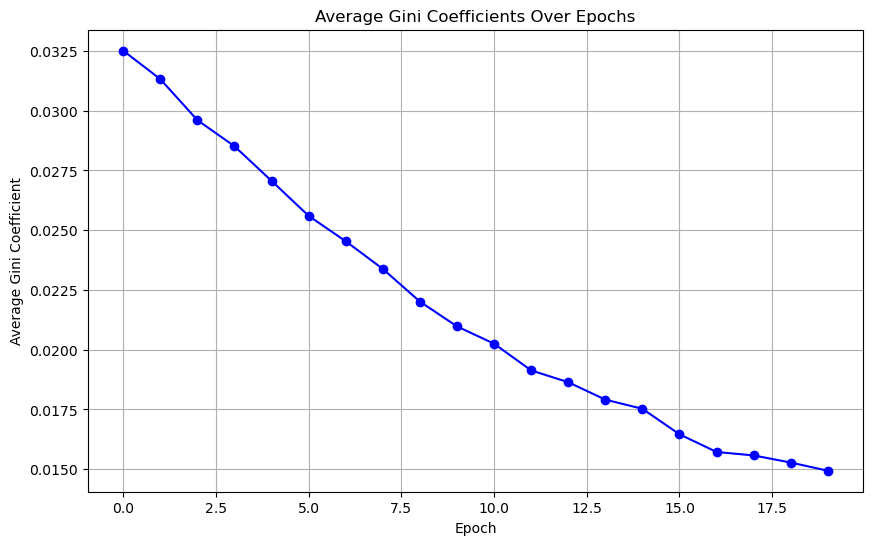

In [10]:
# Calculate the average of each corresponding element across lists
average_gini_coefficients = np.mean(np.array(gini_coefficients), axis=0)
print("Gini Coefficients: \n" + str(average_gini_coefficients))

# Visualize the averaged Gini coefficients
plt.figure(figsize=(10, 6))
x_values = range(len(average_gini_coefficients))
plt.plot(x_values, average_gini_coefficients, marker='o', linestyle='-', color='b')
plt.title('Average Gini Coefficients Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Gini Coefficient')
plt.grid(True)
plt.show()